In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

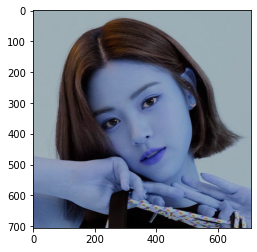

In [2]:
import os

my_image_path = os.path.dirname(os.path.abspath('__file__')) + r'/camera_sticker/images/image(3).jpeg'

img_bgr = cv2.imread(my_image_path) # OpenCV로 이미지 읽기
# img_bgr = cv2.resize(img_bgr, (800, 1200))
img_show = img_bgr.copy() # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

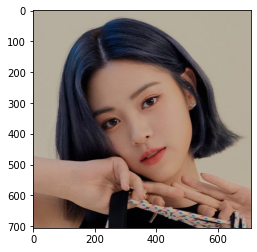

In [3]:
# RGB로 출력
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
import dlib

detector_hog = dlib.get_frontal_face_detector() # detector 선언

In [5]:
# detector를 이용해서 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(205, 241) (526, 562)]]


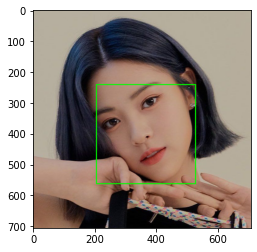

In [6]:
# 찾은 얼굴을 화면에 출력
print(dlib_rects) # 찾은 얼굴 영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# 저장한 landmark 모델 불러오기
import os

model_path = os.path.dirname(os.path.abspath('__file__')) + r'/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


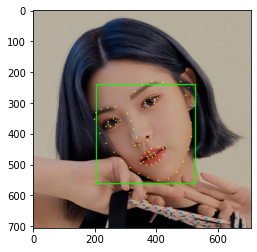

In [9]:
# 랜드마크를 영상에 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코의 좌표
    # 랜드마크에서 코의 좌표
    x = landmark[33][0]
    y = landmark[33][1]
    
    # 얼굴 폭과 높이
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print(f"코의 중심점 위치: ({x}, {y})")
    print(f"얼굴 랜드마크 크기: ({w}, {h})")

(359, 433)
코의 중심점 위치: (359, 433)
얼굴 랜드마크 크기: (322, 322)


(322, 322, 3)


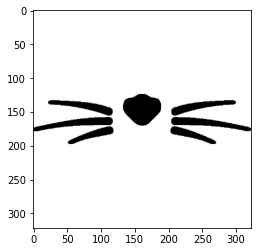

In [11]:
# 스티커 이미지 출력
import os

sticker_path = os.path.dirname(os.path.abspath('__file__')) + r'/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커의 크기를 얼굴 랜드마크 크기로 resize
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [12]:
# 스티커 시작 위치
refined_x = x - w // 2
refined_y = y - h // 2

print(f"이미지에서 스티커 좌표(top-left): ({refined_x}, {refined_y})")

이미지에서 스티커 좌표(top-left): (198, 272)


(322, 322, 3)


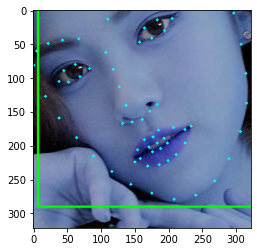

In [13]:
# 스티커 범위(sticker_area)
sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]
print(sticker_area.shape)
plt.imshow(sticker_area)

In [14]:
x_30 = landmark[30][0]
y_30 = landmark[30][1]
x_2 = landmark[2][0]
y_2 = landmark[2][1]

print(f"30번 좌표: ({x_30}, {y_30})")
print(f"2번 좌표: ({x_2}, {y_2})")

30번 좌표: (335, 412)
2번 좌표: (262, 460)


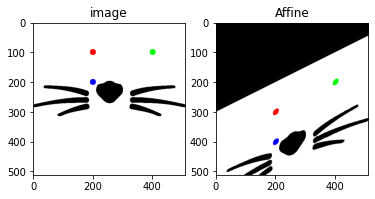

In [16]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

img_path = os.path.dirname(os.path.abspath('__file__')) + r'/camera_sticker/images/cat-whiskers.png'
img  = cv2.imread(img_path)
rows, cols = img.shape[:2]

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

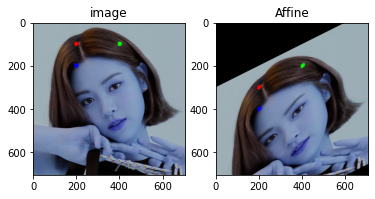

In [18]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

img_path = os.path.dirname(os.path.abspath('__file__')) + r'/camera_sticker/images/image(3).jpeg'
img  = cv2.imread(img_path)
rows, cols = img.shape[:2]

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()